In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; print('Seaborn version is: ', sns.__version__)
sns.set()
%matplotlib inline

Seaborn version is:  0.11.0


In [2]:
college = pd.read_csv('../data/College.csv', index_col=0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 8

### 8.c.1

In [3]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


### 8.c.2

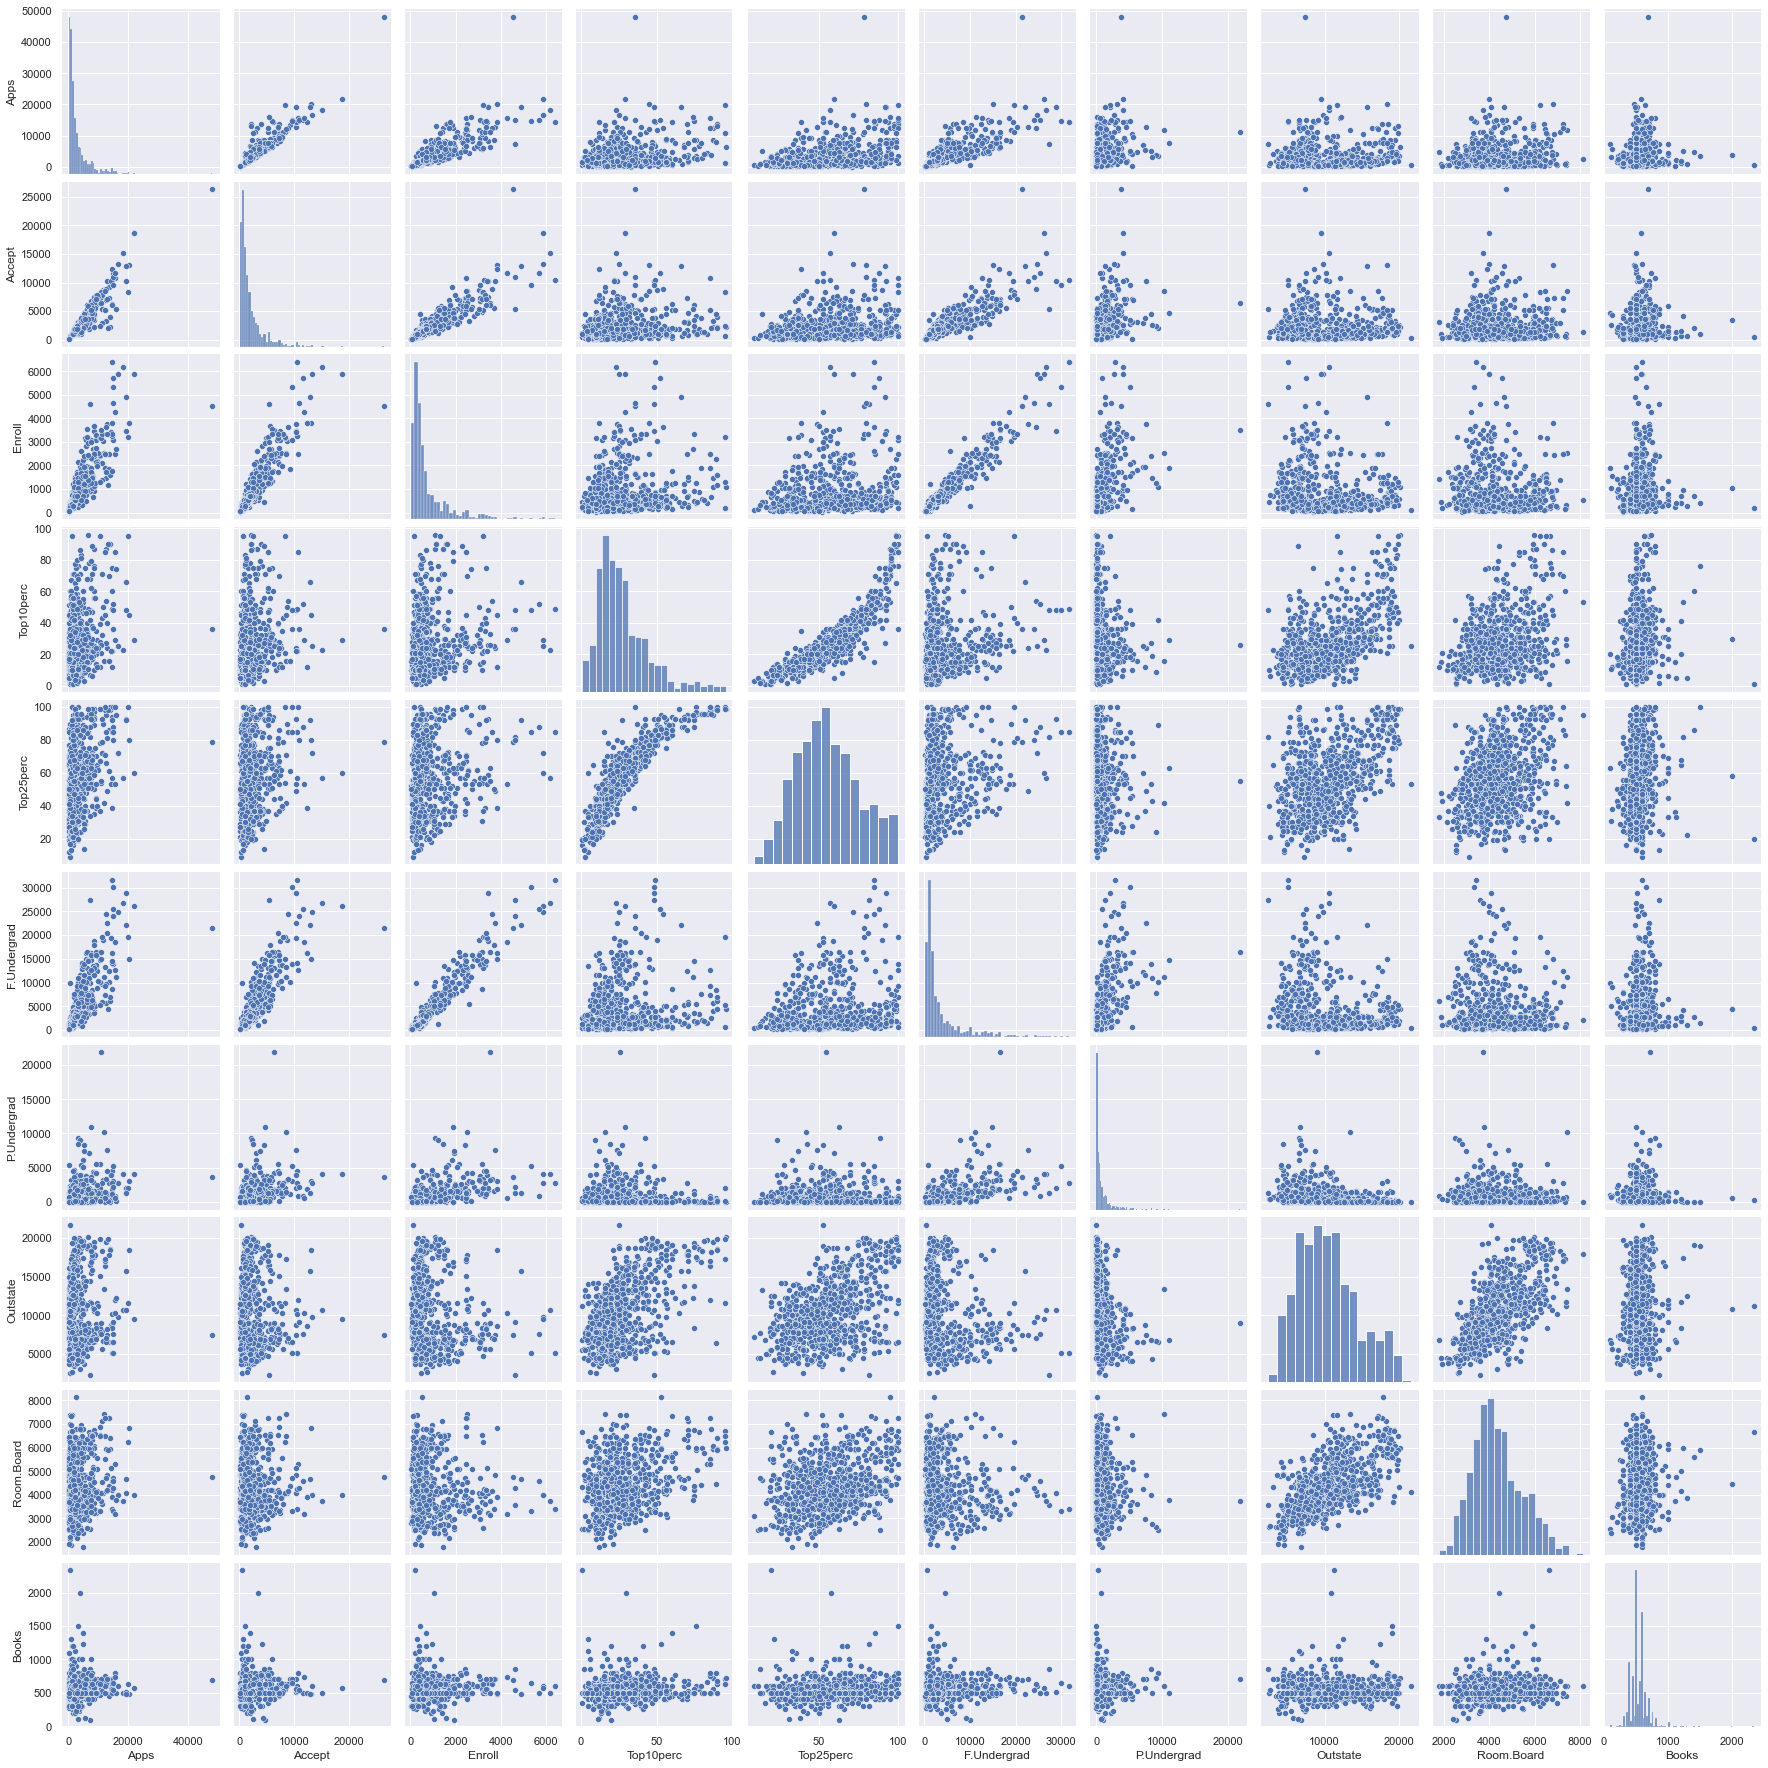

In [5]:
# pd.plotting.scatter_matrix(college, alpha=0.3, figsize=(18, 18)); # using pandas
sns.pairplot(college.iloc[:, 1:11]); # using seaborn

### 8.c.3

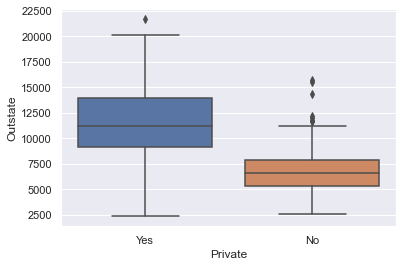

In [6]:
sns.boxplot(data=college, x='Private', y='Outstate');

### 8.c.4

There are 78 elite universities


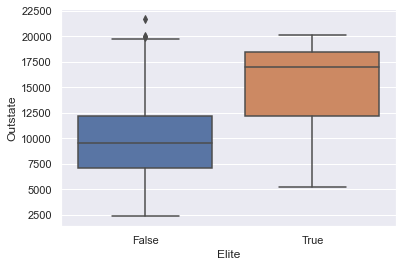

In [7]:
college['Elite'] = (college['Top10perc'] > 50)
print('There are {0} elite universities'.format(np.sum(college['Elite'])))
sns.boxplot(data=college, x='Elite', y='Outstate');

<AxesSubplot:xlabel='F.Undergrad', ylabel='Count'>

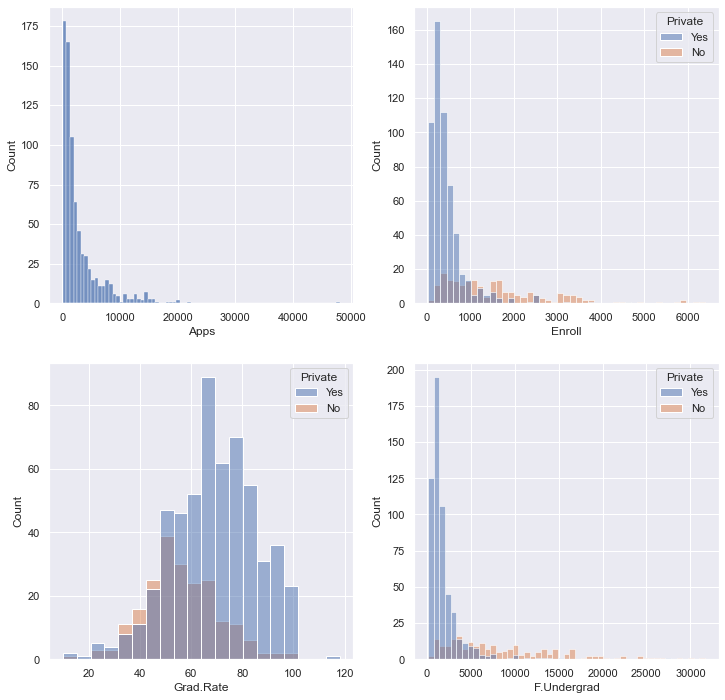

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(college, x='Apps', ax=ax[0, 0])
sns.histplot(college, x='Enroll', ax=ax[0, 1], hue='Private')
sns.histplot(college, x='Grad.Rate', ax=ax[1, 0], hue='Private')
sns.histplot(college, x='F.Undergrad', ax=ax[1, 1], hue='Private')

## 9 Auto data set

In [9]:
auto = pd.read_csv('../data/Auto.csv', na_values='?')
rows_with_missing = auto.loc[auto.isna().any(axis=1)] 
display(rows_with_missing)

print('Shape BEFORE dropping missing values: ', auto.shape)
auto.dropna(axis=0, inplace=True)
print('Shape AFTER dropping missing values: ', auto.shape)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


Shape BEFORE dropping missing values:  (397, 9)
Shape AFTER dropping missing values:  (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### 9.a quantitative and qualitative predictors

In [10]:
auto.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [11]:
qual_pred = ['cylinders', 'origin']
for qp in qual_pred:
    auto[qp] = auto[qp].astype('category')
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null category
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null category
name            392 non-null object
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 25.6+ KB


### 9.b & 9.c range, mean, std of quantitative predictors

In [12]:
auto.describe().loc[['mean', 'std']]

,mpg,displacement,horsepower,weight,acceleration,year
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737


In [13]:
auto.describe().loc['max'] - auto.describe().loc['min']

mpg               37.6
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

In [14]:
auto_new = auto.drop(index=range(10, 86), errors='ignore')
print('Shape BEFORE dropping rows 10 through 85: ', auto.shape)
print('Shape AFTER dropping rows 10 through 85: ', auto_new.shape)

Shape BEFORE dropping rows 10 through 85:  (392, 9)
Shape AFTER dropping rows 10 through 85:  (317, 9)


In [15]:
auto_new.describe().loc[['mean', 'std']]

,mpg,displacement,horsepower,weight,acceleration,year
mean,24.374763,187.880126,101.003155,2938.854890,15.704101,77.123028
std,7.872565,100.169973,36.003208,811.640668,2.719913,3.127158


In [16]:
auto_new.describe().loc['max'] - auto_new.describe().loc['min']

mpg               35.6
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
dtype: float64

### 9.e

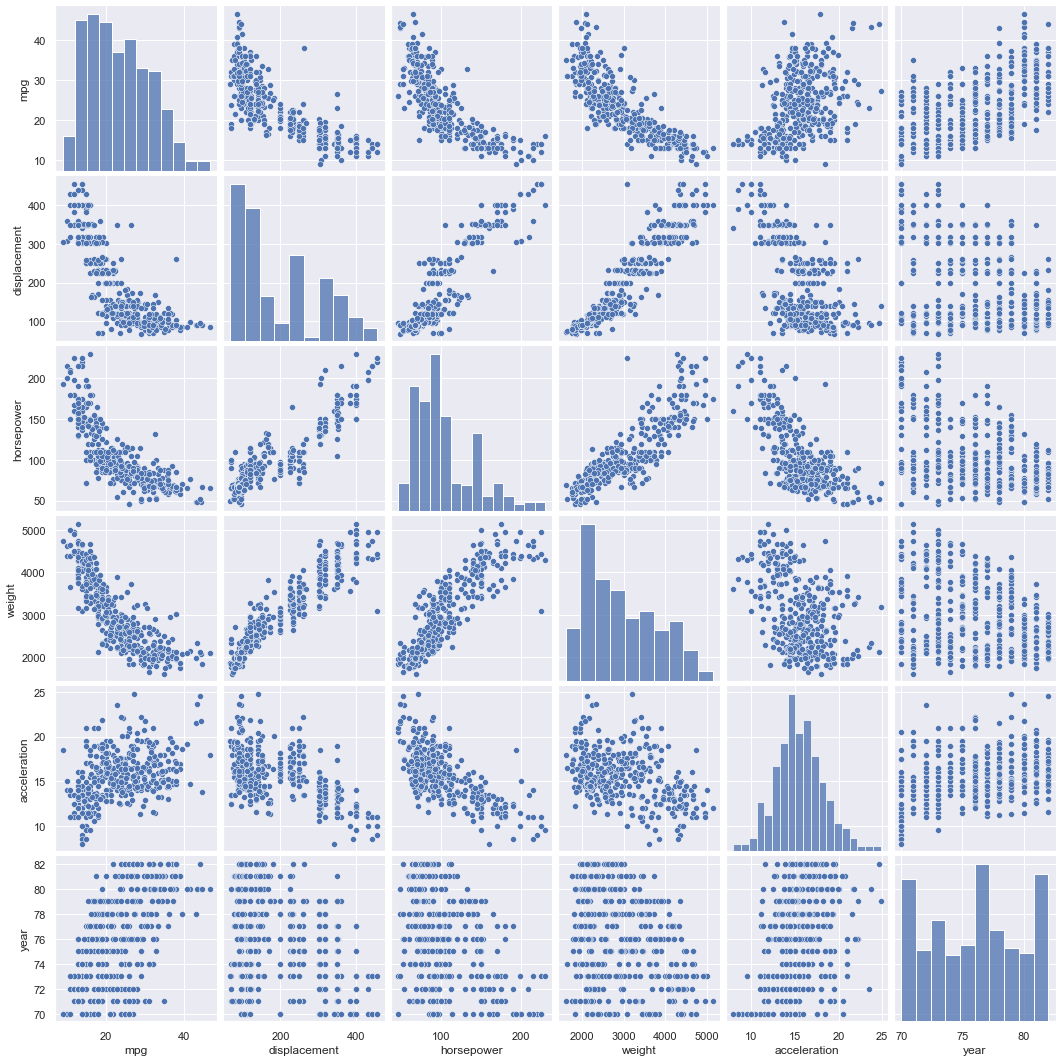

In [17]:
sns.pairplot(auto);

## 10 Boston data set

Columns description 
- crim per capita crime rate by town.
- zn proportion of residential land zoned for lots over 25,000 sq.ft.
- indus proportion of non-retail business acres per town.
- chas Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox nitrogen oxides concentration (parts per 10 million).
- rm average number of rooms per dwelling.
- age proportion of owner-occupied units built prior to 1940.
- dis weighted mean of distances to five Boston employment centres.
- rad index of accessibility to radial highways.
- tax full-value property-tax rate per \$10,000.
- ptratio pupil-teacher ratio by town.
- black 1000(Bk−0.63)2, where Bk is the proportion of blacks by town.
- lstat lower status of the population (percent).
- medv median value of owner-occupied homes in $1000s.

In [18]:
boston = pd.read_csv('../data/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
# 10.e
boston.chas.value_counts()[1]

35

In [20]:
# 10.f
boston.ptratio.median()

19.05

In [21]:
# 10.g
medv_min = boston[boston.medv == boston.medv.min()]
boston.describe().append(medv_min)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
399,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,24.000000,666.000000,20.200000,396.900000,30.590000,5.000000
406,67.920800,0.000000,18.100000,0.000000,0.693000,5.683000,100.000000,1.425400,24.000000,666.000000,20.200000,384.970000,22.980000,5.000000


In [22]:
# 10.h
print('suburbs with more than 7 & 8 rooms are: {0} & {1}'.format((boston.rm > 7).sum(), (boston.rm > 8).sum()))
rm_8 = boston[boston.rm > 8]
boston.describe().loc[['mean', 'max']].append(rm_8.describe().loc[['mean', 'max']])

suburbs with more than 7 & 8 rooms are: 64 & 13


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000
